In [ ]:
!pip install geopandas shapely osmnx folium rasterio ipyleaflet==0.18.2 fiona dask-geopandas overpy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.12.1
    Uninstalling dask-2024.12.1:
      Successfully uninstalled dask-2024.12.1
  Attempting uninstall: ipyleaflet
    Found existing installation: ipyleaflet 0.19.2
    Uninstalling ipyleaflet-0.19.2:
      Successfully uninstalled ipyleaflet-0.19.2
ERROR: pip's dependency resolver does not cu

                                            geometry
0  LINESTRING (115.74572 -33.26364, 115.74576 -33...
1  LINESTRING (115.73831 -33.26605, 115.73823 -33...
2  LINESTRING (115.73652 -33.27324, 115.7366 -33....
3  LINESTRING (115.72732 -33.27569, 115.72706 -33...
4  LINESTRING (115.72496 -33.27677, 115.72523 -33...


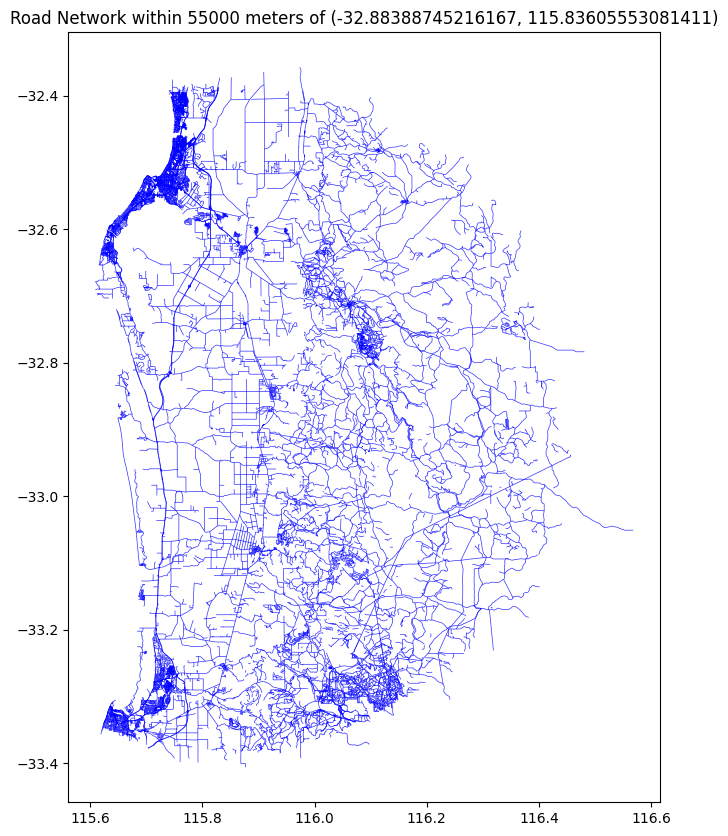

In [ ]:
# Import the required libraries
import overpy
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Function to get road networks within a specified buffer around a point using Overpass API
def get_road_network(lat, lon, buffer_radius):
    # Initialize the Overpass API
    api = overpy.Overpass()

    # Create a query to get roads within the buffer radius
    query = f"""
    [out:json][timeout:25];
    (
      way["highway"](around:{buffer_radius},{lat},{lon});
    );
    out body;
    >;
    out skel qt;
    """

    try:
        # Get the result from the API
        result = api.query(query)

        # Extract road networks
        roads = []
        for way in result.ways:
            nodes = [(float(node.lon), float(node.lat)) for node in way.nodes]
            if len(nodes) > 1:  # Ensure valid lines
                roads.append(LineString(nodes))

        # Create a GeoDataFrame
        gdf = gpd.GeoDataFrame(geometry=roads, crs="EPSG:4326")

        return gdf
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Latitude and longitude of the center point
lat , lon = -32.88388745216167, 115.83605553081411
buffer_radius = 55000  # Buffer radius in meters

# Get the road network within the buffer
road_network = get_road_network(lat, lon, buffer_radius)

# Check if the GeoDataFrame is not empty
if road_network is not None and not road_network.empty:
    # Display the first few rows of the GeoDataFrame
    print(road_network.head())

    # Optionally, save the GeoDataFrame to a file
    road_network.to_file("road_network.geojson", driver='GeoJSON')

    # Plot the road network
    fig, ax = plt.subplots(figsize=(10, 10))
    road_network.plot(ax=ax, color='blue', alpha=0.8, linewidth=0.5)
    plt.title(f"Road Network within {buffer_radius} meters of ({lat}, {lon})")
    plt.show()
else:
    print("No road network found or an error occurred.")
